Autor: ÁLLIFE LICIO LACERDA<br>
Estudo - Algoritmo KMeans

**Atenção**<br>
Esse notebook é melhor visualizado em:
tooltip = "Possível Centro de Abastescimento"


**Situação hipotética**<br>
Somos uma rede de abastecimento de alimentos que atende diversos supermercados do estado de Goiás.
Onde seriam os lugares ideais para construir **dois** centros de abastecimento, sabendo a localização de todos supermercados que atendemos?

In [114]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [115]:
dataset = np.array([
[-16.681206642803705, -49.25627513782444], #goiânia centro
[-16.70193086661866, -49.23276037027382], #goiânia jd goias
[-16.641843531252405, -49.23087760104999], #goiânia novo mundo
[-16.711605181408625, -49.28805849098911], #goiânia jd america
[-16.65978906588014, -49.302645265115494], #goiania campinas
[-16.643806580053933, -49.49469966124476], #trindade
[-16.829791868508046, -49.54519495317936], #guapó
[-16.828719523494335, -49.24119031962455], #aparecida de goiania
[-16.797872779824978, -49.29971404916525], #aparecida de goiania
[-16.82392157767054, -49.2406170489128], #aparecida de goiânia    
[-16.96734618579712, -49.2350105102404], #hidrolândia
[-16.51349167174771, -50.41021430295512], #são luis montes belos
[-16.504476637281346, -49.02020026451412], #goianápolis
[-16.337915137984474, -48.95191466196183], #anápolis
[-17.30184705504271, -49.03546292065684], #piracanjuba
[-16.802536556972335, -49.9304050861977], #Palmeiras de goiás
[-16.3604339797655, -49.49963064078017], #inhumas
[-17.515753834257207, -49.4493242985942],# pontalina
[-17.719938788777142, -48.64182919530672], #caldas novas
[-18.1286216686668, -47.96052318792922], #catalão
[-15.317360323858997, -49.12048106325179], #goianésia
[-18.42750957776642, -49.20957742217813], #itumbiara
[-16.988509758577184, -48.95689187844719] #bela vista de goiás
])

In [116]:
len(dataset)

23

In [117]:
eixo_x = dataset[:,0]
eixo_y = dataset[:,1]

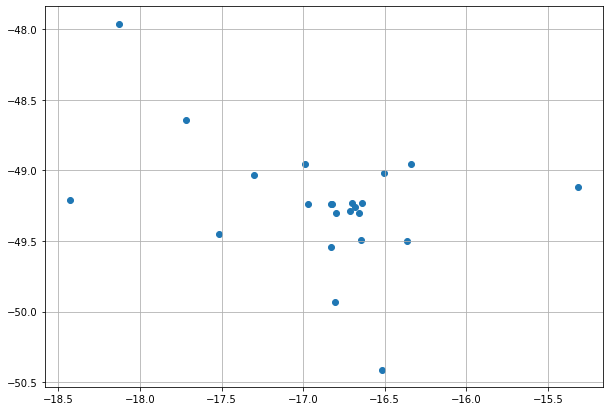

In [118]:
plt.figure(figsize=(10,7))
plt.scatter(eixo_x, eixo_y)
plt.grid()
plt.show()

In [119]:
import folium

In [120]:
m = folium.Map(location=dataset[0], zoom_start=8, tiles = 'OpenStreetMap')

tooltip = "Supermercado"

for loc in dataset:
    folium.Marker(tuple(loc),tooltip=tooltip).add_to(m)
m

### Utilizando KMeans para encontrar a melhor localização possível para 2 centros de abastecimento.

In [121]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, max_iter = 300)
pred_y = kmeans.fit_predict(dataset)

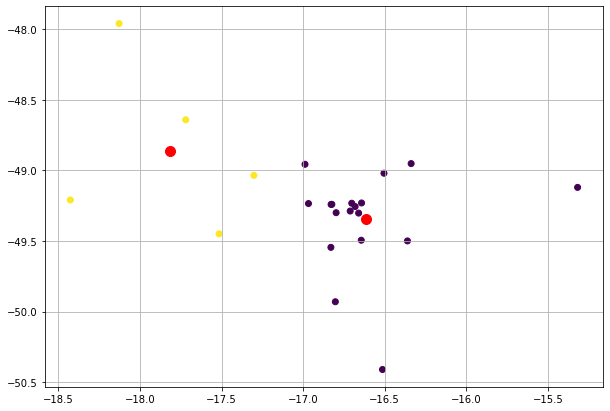

In [122]:
plt.figure(figsize=(10,7))
plt.scatter(eixo_x, eixo_y, c = pred_y)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = 'red')
plt.grid()
plt.show()

### Visualizando os locais perfeitos

In [123]:
locais = kmeans.cluster_centers_

In [124]:
locais

array([[-16.61736433, -49.34759896],
       [-17.81873418, -48.8593434 ]])

In [125]:
m = folium.Map(location=dataset[0], zoom_start=8, tiles = 'OpenStreetMap')

tooltip = "Possível Centro de Abastescimento"

for loc in locais:
    folium.Marker(
        tuple(loc),
        tooltip=tooltip,
        icon = folium.Icon(color = "black", icon = "ok-sign")
    ).add_to(m)

for loc in dataset:
    folium.Marker(
        tuple(loc),
        tooltip=tooltip,
        icon = folium.Icon(color = "lightblue", icon = "ok-sign")
    ).add_to(m)
    
m